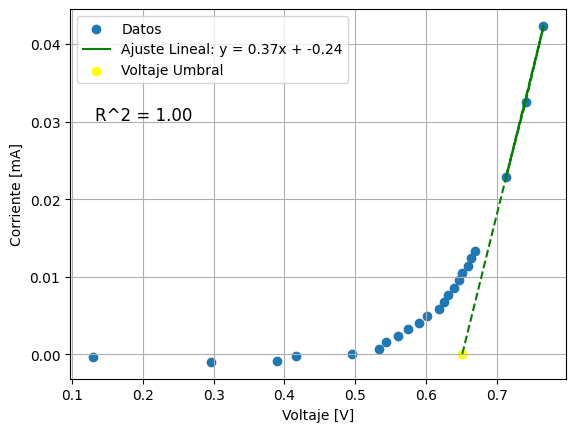

Pendiente (m): 0.3669559032716916
Ordenada al Origen (b): -0.2389473684210518
Voltaje Umbral: 0.6511609877117492


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carga los datos desde el archivo CSV
data = pd.read_csv('C:\\Users\\madro\\OneDrive\\Documents\\Python-\\electronica\\1Diodo.csv')

# Supongamos que tienes dos columnas llamadas 'ColumnaX' y 'ColumnaY'
x = data['V en el diodo']
y = data['Corriente']


# Definir un umbral para excluir ciertos datos
umbral = 0.7  # Cambia esto al valor que desees

# Filtrar los datos para excluir aquellos por debajo del umbral
x_filtrado = x[x >= umbral]
y_filtrado = y[x >= umbral]

# Realizar el ajuste lineal usando numpy en los datos filtrados
slope, intercept = np.polyfit(x_filtrado, y_filtrado, 1)

# Calcular el coeficiente de determinación (R cuadrado)
residuals = y_filtrado - (slope * x_filtrado + intercept)
ss_residual = np.sum(residuals**2)
ss_total = np.sum((y_filtrado - np.mean(y_filtrado))**2)
r_squared = 1 - (ss_residual / ss_total)

# Crear una función de ajuste lineal
fit_line = slope * x_filtrado + intercept

# Extender la recta de ajuste lineal hasta tocar el eje X
x_extendido = np.concatenate((x_filtrado, [x_interseccion]))
y_extendido = np.concatenate((y_filtrado, [0]))

# Graficar los datos originales, el ajuste lineal y la extensión de la recta hasta el eje X
plt.scatter(x, y, label='Datos')
plt.plot(x_filtrado, fit_line, color='green', label=f'Ajuste Lineal: y = {slope:.2f}x + {intercept:.2f}')
plt.plot(x_extendido, y_extendido, color='green', linestyle='--')

# Marcar el punto de intersección con el eje X
plt.scatter([x_interseccion], [0], color='yellow', marker='o', label='Voltaje Umbral')

# Agregar el valor del coeficiente de determinación al gráfico
plt.annotate(f'R^2 = {r_squared:.2f}', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12, color='black')

plt.xlabel('Voltaje [V]')
plt.ylabel('Corriente [mA]')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir la pendiente y la ordenada al origen
print(f'Pendiente (m): {slope}')
print(f'Ordenada al Origen (b): {intercept}')
print(f'Voltaje Umbral: {x_interseccion}')



In [65]:

# Calcular los errores estándar de la pendiente y la ordenada al origen utilizando numpy
coefficients, cov_matrix = np.polyfit(x_filtrado, y_filtrado, 1, cov=True)
SE_slope = np.sqrt(cov_matrix[0, 0])  # Error estándar de la pendiente
SE_intercept = np.sqrt(cov_matrix[1, 1])  # Error estándar de la ordenada al origen
print("Error estándar de la pendiente: ", SE_slope)
print("Error estándar de la ordenada al origen: ", SE_intercept)
# Calcular el corrimiento del error en el valor de intersección
SE_x_interseccion = np.sqrt((SE_intercept / slope)**2 + ((-intercept * SE_slope) / (slope**2))**2)
print("Corrimiento del error en el valor de intersección: ", SE_x_interseccion)



Error estándar de la pendiente:  0.012318995786409258
Error estándar de la ordenada al origen:  0.0091199570629555
Corrimiento del error en el valor de intersección:  0.03309880202691492


In [67]:
# Calcular 1/slope y su error asociado
one_over_slope = 1 / slope
SE_one_over_slope = abs((1 / (slope ** 2)) * SE_slope)
print("La inversa de la pendiente es: ", one_over_slope, "y el error en ella es: ",SE_one_over_slope)

La inversa de la pendiente es:  2.7251230763267134 y el error en ella es:  0.09148450643634924
